In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:/Users/athar/Downloads/Compressed/uber.csv/uber.csv")

In [11]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [15]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [19]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [21]:
df = df.dropna()

In [23]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

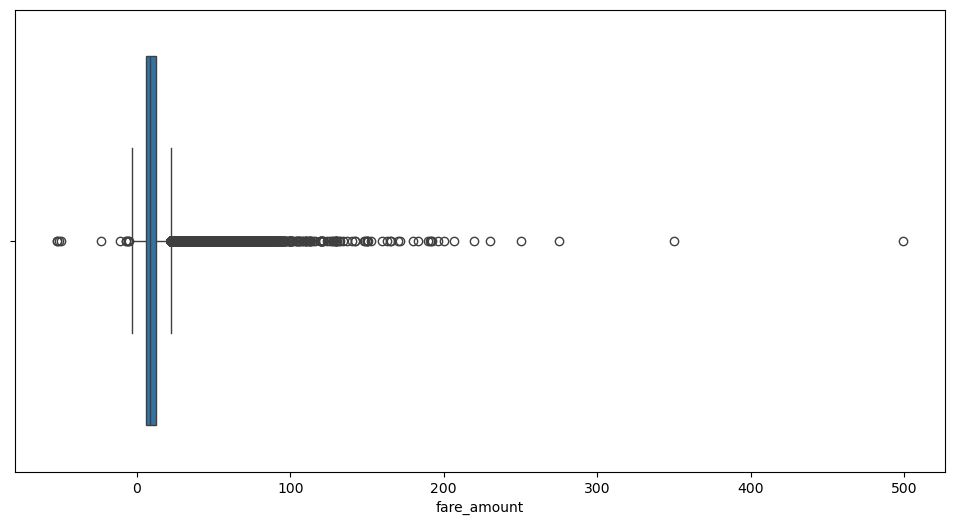

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['fare_amount'])
plt.show()

In [27]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
IQR = q3-q1
lowerbound = q1 - 1.5 * IQR
upperbound = q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lowerbound) & (df['fare_amount'] <= upperbound)]

<Axes: xlabel='fare_amount'>

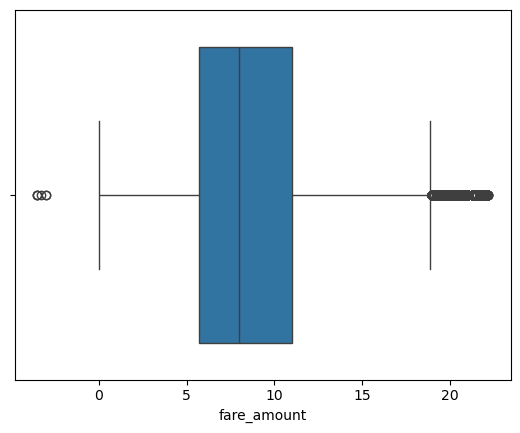

In [29]:
sns.boxplot(x=df['fare_amount'])

In [31]:
df.drop(columns=["Unnamed: 0","key","pickup_datetime"],axis=1, inplace=True)
df

C:\Users\athar\AppData\Local\Temp\ipykernel_58080\3294858516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 0","key","pickup_datetime"],axis=1, inplace=True)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: >

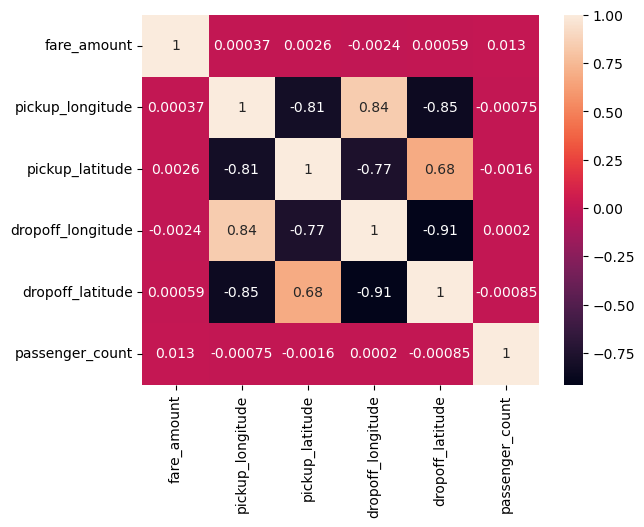

In [35]:
cm = df.corr(numeric_only=True)
sns.heatmap(cm,annot=True)

In [37]:
x = df.drop("fare_amount",axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [39]:
y = df["fare_amount"]
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 182833, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
xt,xtt,yt,ytt = train_test_split(x,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
lrmodel = lr.fit(xt,yt)

In [55]:
lrpreds = lrmodel.predict(xtt)

In [57]:
from sklearn.metrics import mean_squared_error , r2_score

In [59]:
mse = mean_squared_error(ytt,lrpreds)
mse

17.272535132318502

In [63]:
rmse = mse**0.5
rmse

4.156023957139625

In [65]:
r2 = r2_score(ytt,lrpreds)
r2

0.00023847441162450078

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor()

In [71]:
rfmodel = rf.fit(xt,yt)

In [73]:
rfpreds = rfmodel.predict(xtt)

rfmse = mean_squared_error(ytt,rfpreds)
rfmse

rfrmse = rfmse ** 0.5
rfrmse

2.252724026749266